# Titanic Survival Prediction Dataset

This dataset was taken from Kaggle's Titanic-Machine Learning from Disaster challenge
 <br> Link to the dataset: https://www.kaggle.com/c/titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('train.csv')
tdf=pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
xdf=df.drop(columns=['Cabin'])

In [9]:
xdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

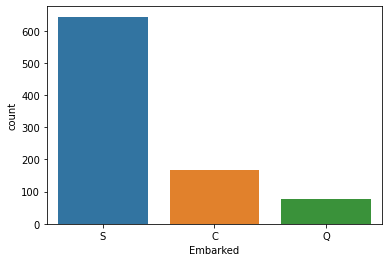

In [10]:
sns.countplot(xdf['Embarked'])

C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

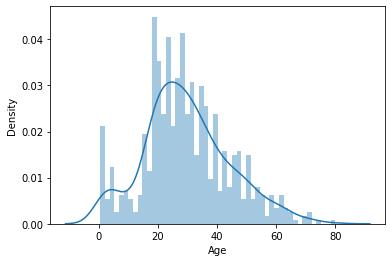

In [11]:
sns.distplot(xdf['Age'],bins=50)

In [12]:
xdf[xdf['Pclass']==1]['Age'].mean()

38.233440860215055

In [13]:
xdf[xdf['Pclass']==2]['Age'].mean()

29.87763005780347

In [14]:
xdf[xdf['Pclass']==3]['Age'].mean()

25.14061971830986

In [15]:
xdf[(xdf['Sex']=='male') & (xdf['Pclass']==1)]['Age'].mean()

41.28138613861386

In [16]:
xdf[(xdf['Sex']=='female') & (xdf['Pclass']==1)]['Age'].mean()

34.61176470588235

In [17]:
xdf[(xdf['Sex']=='male') & (xdf['Pclass']==2)]['Age'].mean()

30.74070707070707

In [18]:
xdf[(xdf['Sex']=='female') & (xdf['Pclass']==2)]['Age'].mean()

28.722972972972972

In [19]:
xdf[(xdf['Sex']=='male') & (xdf['Pclass']==3)]['Age'].mean()

26.507588932806325

In [20]:
xdf[(xdf['Sex']=='female') & (xdf['Pclass']==3)]['Age'].mean()

21.75

In [21]:
x=xdf.iloc[0]

In [22]:
x['Pclass']

3

In [23]:
def ageImpute(cols):
    age=cols[0]
    Pclass=cols[1]
    sex=cols[2]
    if(pd.isnull(age)):
        if(sex=='male'):
            if(Pclass==1):
                return 41
            if(Pclass==2):
                return 31
            if(Pclass==3):
                return 26
        elif(sex=='female'):
            if(Pclass==1):
                return 35
            if(Pclass==2):
                return 29
            if(Pclass==3):
                return 22
    else:
         return age
            
       

In [24]:
xdf['Age']=xdf[["Age",'Pclass','Sex']].apply(ageImpute,axis=1)

In [25]:
xdf['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [26]:
xdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [27]:
xdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [28]:
xdf['Embarked'].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [29]:
xdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [30]:
xdf.shape

(891, 11)

In [31]:
xdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

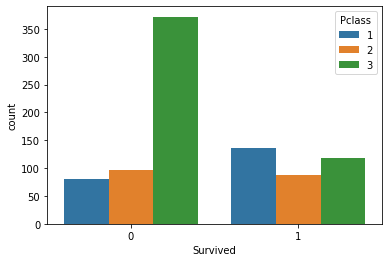

In [32]:
sns.countplot(xdf['Survived'],hue=xdf['Pclass'])

C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

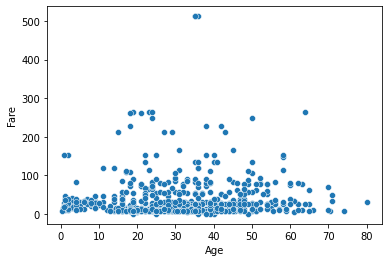

In [33]:
sns.scatterplot(df['Age'],df['Fare'])

There seems to be a remarkable amount of Pclass 3 passengers among the dead. This could also mean that fare is a good estimate of survival chances

C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

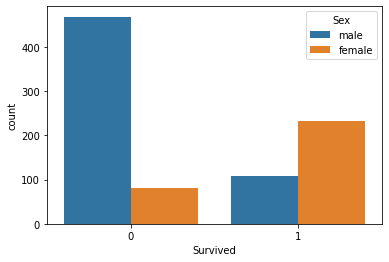

In [34]:
sns.countplot(xdf['Survived'],hue=xdf['Sex'])

An overwhelming amount of men are among the dead. Being a male significantly reduces your chances of surviving the event. 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

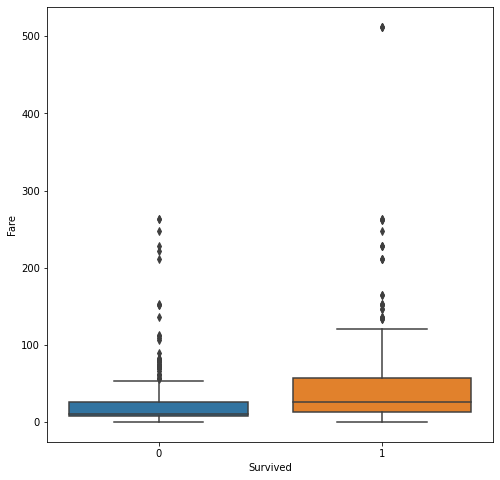

In [35]:
plt.figure(figsize=(8,8))
sns.boxplot(x=xdf['Survived'],y=xdf['Fare'])

On average, there seems to be a trend that a higher fare results in a higher rate of survival

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

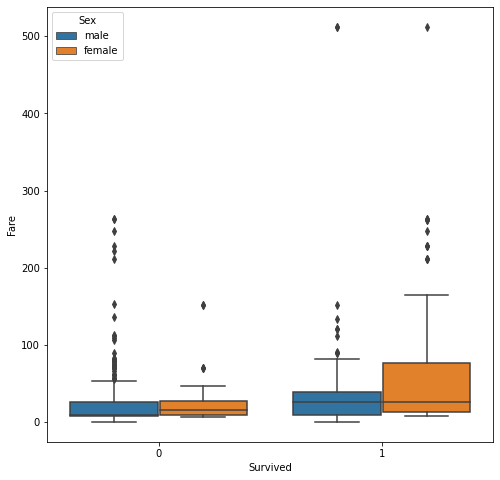

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(x=xdf['Survived'],y=xdf['Fare'],hue=xdf['Sex'])

<AxesSubplot:>

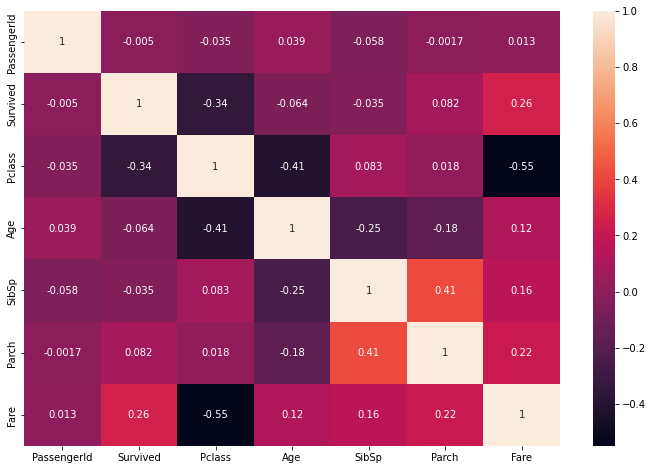

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(xdf.corr(),annot=True)

In [38]:
xdf['Sex']=pd.get_dummies(xdf['Sex'],drop_first=True)#Male=1, female=0

In [39]:
xdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [40]:
xdf.drop(columns=['Ticket'],inplace=True)


In [41]:
xdf['Family']=xdf['SibSp']+xdf['Parch']

In [42]:
xdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,0


C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

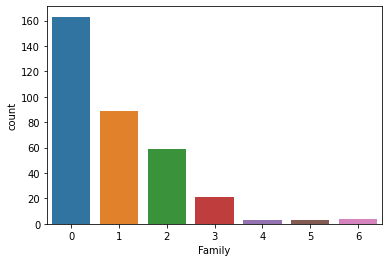

In [43]:
sns.countplot(xdf[xdf['Survived']==1]['Family'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

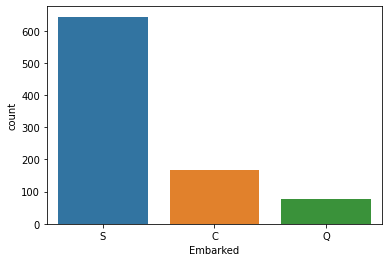

In [44]:
sns.countplot(x=xdf['Embarked'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

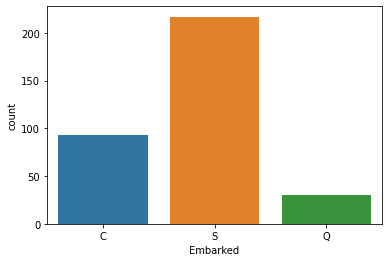

In [45]:
sns.countplot(x=xdf[xdf['Survived']==1]['Embarked'])

As the number of people who embarked at S are the highest, this is expected. Trend follows making C second and Q third

<AxesSubplot:xlabel='Embarked', ylabel='count'>

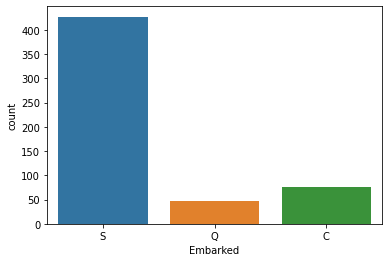

In [46]:
sns.countplot(x=xdf[xdf['Survived']==0]['Embarked'])

The same trend follows as observed previously, though the difference between S and C is remarkably lower. However, no opinions can be formed on this as it could just be due to the numerical differences

In [47]:
xdf.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.277407,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.282795,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000


C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

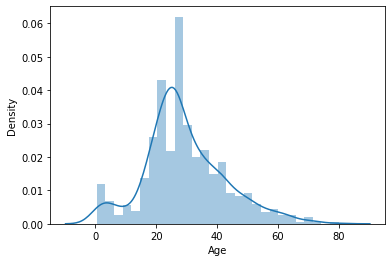

In [48]:
sns.distplot(xdf['Age'])

In [49]:
xdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Family         0
dtype: int64

In [50]:
xdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Family         0
dtype: int64

In [51]:

xdf.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.277407,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.282795,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000


C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

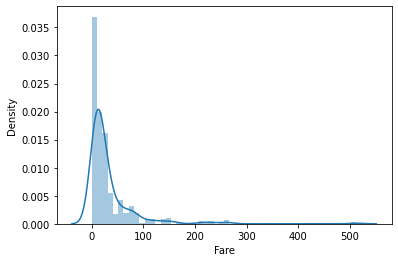

In [52]:
sns.distplot(xdf['Fare'])

In [53]:
y=xdf[xdf['Family']>4]

In [54]:
y.shape

(47, 11)

C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

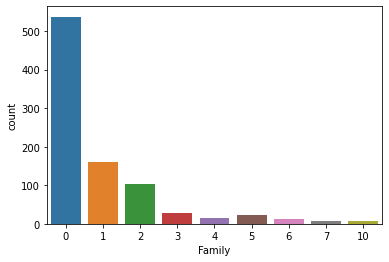

In [55]:
sns.countplot(xdf['Family'])

In [56]:
xdf.fillna("S")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,0


In [57]:
xdf.shape

(891, 11)

In [58]:
xdf.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.277407,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.282795,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [59]:
xdf.drop(columns=['SibSp','Parch'],inplace=True)

In [60]:
xdf

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000,C,0


In [61]:
xdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,13.00,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.00,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,23.45,S,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,30.00,C,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,7.75,Q,0


As observed earlier, women, especially unmarried women, are more in the rescued even if the relative numbers are much lower

In [62]:
xdf.drop(columns=['Name',"Embarked"],inplace=True)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
xdf

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family
0,1,0,3,1,22.0,7.2500,1
1,2,1,1,0,38.0,71.2833,1
2,3,1,3,0,26.0,7.9250,0
3,4,1,1,0,35.0,53.1000,1
4,5,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,0
887,888,1,1,0,19.0,30.0000,0
888,889,0,3,0,22.0,23.4500,3
889,890,1,1,1,26.0,30.0000,0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(xdf.drop(columns=["Survived","PassengerId"]), xdf['Survived'], test_size=0.33, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lm=LogisticRegression()

In [92]:
X_train

,Pclass,Sex,Age,Fare,Family
6,1,1,54.0,51.8625,0
718,3,1,26.0,15.5000,0
685,2,1,25.0,41.5792,3
73,3,1,26.0,14.4542,1
882,3,0,22.0,10.5167,0
...,...,...,...,...,...
106,3,0,21.0,7.6500,0
270,1,1,41.0,31.0000,0
860,3,1,41.0,14.1083,2
435,1,0,14.0,120.0000,3


In [87]:
lm.fit(X_train,y_train)

LogisticRegression()

In [88]:
predictions=lm.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       175
           1       0.83      0.72      0.77       120

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.82       295
weighted avg       0.83      0.83      0.82       295



In [72]:
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetBinaryClassifier
from skorch.callbacks import EpochScoring

In [73]:
class Classifier(nn.Module):
    def __init__(self,input_shape=X_train.shape[1]):
        super().__init__()
        self.fc1 = nn.Linear(input_shape,32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [74]:
acc = EpochScoring(scoring='accuracy', lower_is_better=False)

In [75]:
net = NeuralNetBinaryClassifier(
    Classifier,
    max_epochs=50,
    lr=0.05,
    batch_size=20,
    callbacks=[acc]
#     device='cuda',  # uncomment this to train with CUDA
)

In [76]:
net.fit(np.array(X_train,dtype='float32'),np.array(y_train,dtype='float32'))

  epoch    accuracy    train_loss    valid_acc    valid_loss     dur
-------  ----------  ------------  -----------  ------------  ------
      1      0.6083        0.7332       0.6083        0.6932  1.4800
      2      0.6083        0.6932       0.6083        0.6932  0.0440
      3      0.6083        0.6932       0.6083        0.6932  0.0480
      4      0.6083        0.6932       0.6083        0.6932  0.0490
      5      0.6083        0.6932       0.6083        0.6932  0.0400
      6      0.6083        0.6932       0.6083        0.6932  0.0400
      7      0.6083        0.6932       0.6083        0.6932  0.0360
      8      0.6083        0.6932       0.6083        0.6932  0.0400
      9      0.6083        0.6932       0.6083        0.6932  0.0480
     10      0.6083        0.6932       0.6083        0.6932  0.0440
     11      0.6083        0.6932       0.6083        0.6932  0.0440
     12      0.6083        0.6932       0.6083        0.6932  0.0400
     13      0.6083        0.6932 

<class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=Classifier(
    (fc1): Linear(in_features=6, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=64, bias=True)
    (fc3): Linear(in_features=64, out_features=1, bias=True)
  ),
)

In [77]:
net.history[0]

{'batches': [{'train_loss': 0.716935932636261, 'train_batch_size': 20},
  {'train_loss': 1.0350122451782227, 'train_batch_size': 20},
  {'train_loss': 0.6799226999282837, 'train_batch_size': 20},
  {'train_loss': 0.640126645565033, 'train_batch_size': 20},
  {'train_loss': 1.1471577882766724, 'train_batch_size': 20},
  {'train_loss': 0.8913732767105103, 'train_batch_size': 20},
  {'train_loss': 0.6931403875350952, 'train_batch_size': 20},
  {'train_loss': 0.6934210062026978, 'train_batch_size': 20},
  {'train_loss': 0.6931474804878235, 'train_batch_size': 20},
  {'train_loss': 0.6931099891662598, 'train_batch_size': 20},
  {'train_loss': 0.6931470632553101, 'train_batch_size': 20},
  {'train_loss': 0.6931471824645996, 'train_batch_size': 20},
  {'train_loss': 0.6931471824645996, 'train_batch_size': 20},
  {'train_loss': 0.6931471824645996, 'train_batch_size': 20},
  {'train_loss': 0.6931471824645996, 'train_batch_size': 20},
  {'train_loss': 0.6931473016738892, 'train_batch_size': 20},

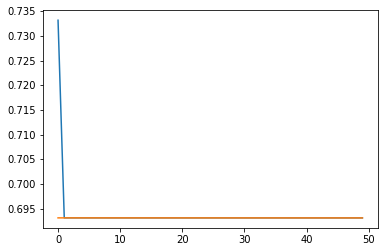

In [78]:
plt.plot(net.history[:,'train_loss'])
plt.plot(net.history[:,'valid_loss'])

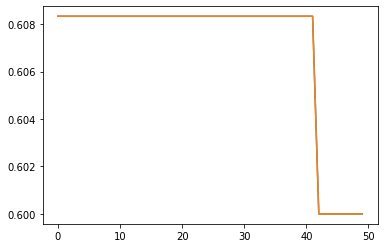

In [79]:
plt.plot(net.history[:,'accuracy'])
plt.plot(net.history[:,'valid_acc'])

In [80]:
import sklearn

In [81]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [82]:
import pickle

In [91]:
filename = 'Logistic.sav'
pickle.dump(lm, open(filename, 'wb'))
